## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#Read csv file
df = pd.read_csv('ab_data.csv')
df_copy = df.copy() #make backup

df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df_size = df.shape[0]
df_size

294478

c. The number of unique users in the dataset.

In [4]:
user_size = df.user_id.unique().shape[0]
user_size

290584

d. The proportion of users converted.

In [5]:
df.converted.sum()/df_size

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
print('Size of dataset is',df_size)

df.info()

Size of dataset is 294478
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**DataFrame information shows no null values in either row.**

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.drop(df[(df.group!='treatment') & (df.landing_page=='new_page')].index)
df2 = df2.drop(df2[(df2.group=='treatment') & (df2.landing_page!='new_page')].index)
df2.describe()

,user_id,converted
count,290585.000000,290585.000000
mean,788004.825246,0.119597
std,91224.582639,0.324490
min,630000.000000,0.000000
25%,709035.000000,0.000000
50%,787995.000000,0.000000
75%,866956.000000,0.000000
max,945999.000000,1.000000


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2_size = df2.shape[0]
user_size = df2.user_id.unique().shape[0]
df2_size, user_size

(290585, 290584)

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.user_id.duplicated(keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2.drop(index=2893)
df2_copy = df2.copy() #make copy
df2.describe()

,user_id,converted
count,290584.000000,290584.000000
mean,788004.876222,0.119597
std,91224.735468,0.324490
min,630000.000000,0.000000
25%,709034.750000,0.000000
50%,787995.500000,0.000000
75%,866956.250000,0.000000
max,945999.000000,1.000000


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2.converted.sum()/df2_size

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
df2[df2.group=='control'].converted.sum()/df2[df2.group=='control'].shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
df2[df2.group=='treatment'].converted.sum()/df2[df2.group=='treatment'].shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
df2[df2.landing_page=='new_page'].shape[0]/df2_size

0.5000602233425676

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Given that there was an equal chance of receiving either the new or old page, the convert rates for either group are nearly similar at 12%. Although a ~1.25% difference can be measured between both rates, this does not seem statistically significant.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**To test this possibility of a False Positive (Type I error), we form the following:**

**Null Hypothesis:** The convert rate for the old page is greater than or equal to that of the new page

**H<sub>0</sub>: p<sub>old</sub> - p<sub>new</sub> ≥ 0**

**Alternate Hypothesis:** The convert rate of the old page is less than that of the new page

**H<sub>1</sub>: p<sub>old</sub> - p<sub>new</sub> < 0**



`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
p_new = df2.converted.mean() #assumed as equal to the converted rate in ab_data.csv regardless of the page 
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old = df2.converted.mean() #assumed as equal to the converted rate in ab_data.csv regardless of the page
p_old

0.11959708724499628

c. What is $n_{new}$?

In [20]:
n_new = df2[df2.group=='treatment'].shape[0]
n_new

145310

d. What is $n_{old}$?

In [21]:
n_old = df2[df2.group=='control'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
#Simulating n_new (i.e., size) transactions will require a binomial distribution
num_trials = 1  #number of trials is one since users convert after one interaction
                #with a probability of p_new
new_page_converted = np.random.binomial(num_trials,p_new,size=n_new)
new_page_converted.mean()

0.11864290138324961

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
#Simulating n_old (i.e., size) transactions will require a binomial distribution
old_page_converted = np.random.binomial(num_trials,p_old,size=n_old)
old_page_converted.mean()

0.11937442350317332

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
#near zero difference
new_page_converted.mean() - old_page_converted.mean()

-0.0007315221199237082

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
N = 10000
p_diffs = np.zeros(N)

for n in range(N):
    new_page_converted = np.random.binomial(num_trials,p_new,size=n_new)
    old_page_converted = np.random.binomial(num_trials,p_old,size=n_old)
    p_diffs[n] = new_page_converted.mean() - old_page_converted.mean()

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

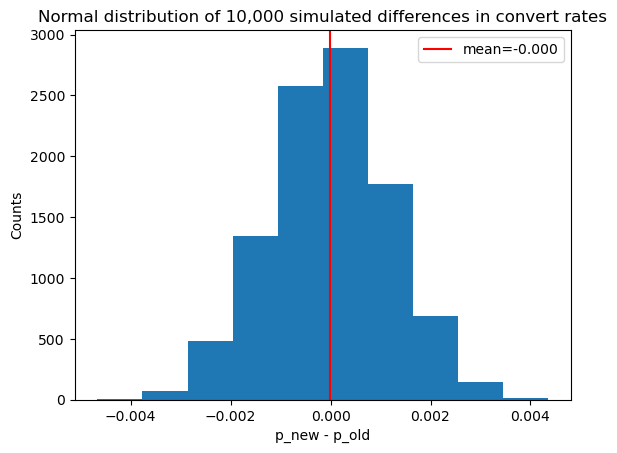

In [26]:
plt.hist(p_diffs)
plt.axvline(x=p_diffs.mean(),color='r',label='mean='+f'{p_diffs.mean():.3f}')
plt.xlabel('p_new - p_old')
plt.ylabel('Counts')
plt.title('Normal distribution of 10,000 simulated differences in convert rates')
plt.legend()

**The 10,000 simulated differences form a normal distribution, while the mean is zero.**

---

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
p_new = df2[df2.group=='treatment'].converted.sum()/df2[df2.group=='treatment'].shape[0] 
p_old = df2[df2.group=='control'].converted.sum()/df2[df2.group=='control'].shape[0] 
obs_diff = p_new - p_old
(obs_diff < p_diffs).mean()

0.8998

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We have computed the p-value for a sample distribution assuming our Null hypothesis that p_new is greater than or equal to p_old. Given such a large p-value, we fail to reject the Null hypothesis. In other words, the convert rate of the old page performs as well as that of the new page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

convert_old = df2[df2.group=='control'].converted.sum()
convert_new = df2[df2.group=='treatment'].converted.sum()
n_old = df2[df2.group=='control'].shape[0]
n_new = df2[df2.group=='treatment'].shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [29]:
#The link above produces a 404 error. 
#However the documentation from statsmodels.org instructs the following form
counts = [convert_old, convert_new]
num_obs= [n_old, n_new]
alt = 'smaller' #From the documentation, "smaller means that the alternative hypothesis is p1 < p2" 
z_score, p_val = sm.stats.proportions_ztest(counts, num_obs, alternative=alt)
z_score, p_val

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**A z-score represents how many standard deviations a given value is from the mean. A value of +1.3 indicates that the value is 1.3 standard deviations above than the mean. The p-value of 0.905, similar to the p-val=0.904 computed in part j., also infers a high probability of observing this statistic, Thus, we fail to reject the Null Hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**If we want to predict the probability of two possible outcomes, we should use Logistical Regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [30]:
#Copy of back up
df2_lr = df2_copy.copy()

#Add new columns
df2_lr['intercept'] = 1
df2_lr[['ab_page_control','ab_page']] = pd.get_dummies(df2_lr['group'])
#Drop control/old page
df2_lr = df2_lr.drop(['ab_page_control'],axis=1)

df2_lr.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [31]:
logit_mod = sm.Logit(df2_lr['converted'],df2_lr[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [32]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 22 Mar 2023   Pseudo R-squ.:               8.077e-06
Time:                        18:52:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value of 0.19 associated with ab_page differs from a p-val≈0.9 calculated for a difference in proportions in previous sections. The reason is that the Logistic regression model considers the following hypotheses,**

**H<sub>0</sub>: p<sub>old</sub> - p<sub>new</sub> = 0**


**H<sub>1</sub>: p<sub>old</sub> - p<sub>new</sub> ≠ 0**

**This new Null hypothesis infers a two-tailed test. According to https://www.stata.com/support/faqs/statistics/one-sided-tests-for-coefficients/, the conversion to a one-tailed test is,**

**H<sub>0</sub>: p<sub>old</sub> - p<sub>new</sub> = 0 : pval_2tail**

**H<sub>0</sub>: p<sub>old</sub> - p<sub>new</sub> ≤ 0 : pval_Ltail = pval_2tail / 2**

**H<sub>0</sub>: p<sub>old</sub> - p<sub>new</sub> ≥ 0 : pval_Rtail = 1 - pval_2tail / 2**


**Thus,**

pval_Rtail = 1 - 0.19/2 = 0.905

**produces a similar p-value to what was previously calculated.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Additional factors can benefit a regression model as multiple factors can elucidate new relations in the data. However, adding addtional terms can be a disadvantage if those added are not properly representative sample (i.e., too few observations, too long of a duration that includes unaccountable factors, or too short of a duration that fails to provide any useful information. The duration of this A/B testing, calulated below, was about 22 days which is probably too short to observate any temoporal evolution.**

In [33]:
#Calculate duration of test
pd.Timestamp(df.timestamp.max())-pd.Timestamp(df.timestamp.min())

Timedelta('21 days 23:59:49.081927')

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
print(df_new.country.unique())
df_new.head()

['UK' 'US' 'CA']


,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [35]:
### Create the necessary dummy variables
df_new[['uk','us','ca']] = pd.get_dummies(df_new['country'])
df_new = df_new.drop(['us'],axis=1)

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [36]:
### Fit Your Linear Model And Obtain the Results
df_new['intercept'] = 1
df_new[['ab_page_control','ab_page']] = pd.get_dummies(df_new['group'])
#Drop control/old page
df_new = df_new.drop(['ab_page_control'],axis=1)
#interaction between page and country
df_new['ab_page_uk'] = df_new.ab_page * df_new.uk
df_new['ab_page_ca'] = df_new.ab_page * df_new.ca
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','uk','ca','ab_page_uk','ab_page_ca']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 22 Mar 2023   Pseudo R-squ.:               3.482e-05
Time:                        18:52:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
uk            -0.0118      0.040     -0.296      0.767      -0.090       0.066
ca             0.0057      0.019      0.306      0.760      -0.031       0.043
ab_page_uk    -0.0783      0.057     -1.378      0.168      -0.190       0.033
ab_page_ca    -0.0314      0.027     -1.181      0.238      -0.084       0.021
==============================================================================
"""

In [37]:
#exponetiate the coef
1/np.exp(results.params[1:])

ab_page       0.989224
uk            1.011854
ca            0.994272
ab_page_uk    1.081428
ab_page_ca    1.031896
dtype: float64

Using US data as our baseline, with each unit increment, the UK and CA are 1.01 and 0.99 less likely to convert when given the new page. Looking at the combined interation of region (i.e., UK and CA) with ab page, we observe a similar negative correlation.


<a id='conclusions'></a>
## Conclusions

**In conclusion, we were tasked with analyzing the results of an e-commerce site to determine whether a new page should be implemented. This was performed in three parts,**

- Part I: Probability approarch
- Part II: A/B Test approarch
- Part I: A regression approarch



**In Part I, we cleaned and divided the data in two: control and treatment groups (i.e., visitors received the old or new page). While site visitors had 50:50 chance of recieving either page, the convert rate of either group was similar at ~12%.**

**In Part II, we form the hypotheses:**

**H<sub>0</sub>: p<sub>old</sub> - p<sub>new</sub> ≥ 0**

**H<sub>1</sub>: p<sub>old</sub> - p<sub>new</sub> < 0**

**and assume that the propability of the new page and probability of the old page are both equal to the converted rate of the entire date set, 12%. After two tests, bootstrapping 10,000 simulation and a proportion z-test, we failed to reject the Null hypothesis.**

**In Part III, we ran a Logistical regression which also failed to reject the Null hypothesis. Even after including locaftion data, no location showed any increase in convert rate probability.**

**Thus, given the present results we find that the old page performed as well as the new page. Perhaps, duration of 22 days is too short to avoid any influence Change advesrion or Novelty effect. It is difficult to say without additional data.**

